In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
from matplotlib import pyplot as plt
csv_path = "C:/Users/edgil/Documents/Masters/machine_learning/Coursework/video_data"

In [5]:
train = r"/1trn.SSV"
test = r"/1tst.SSV"
train_data = pd.read_csv(csv_path + train, header = None, sep = "\t")
test_data = pd.read_csv(csv_path + test, header = None, sep = "\t")

In [6]:
print(train_data.shape)

(300, 17)


In [29]:
new_col_names = ["p1", "p2","p3", "p4","p5","p6","p7","p8","p9","p10","p11","p12","p13","p14","p15","p16","target"]
col_names = dict(zip(list(train_data.columns),new_col_names ))
train_data.rename(columns = col_names, inplace=True)
#split the data into predictor and target space
X = train_data.loc[:, train_data.columns != "target"]
Y = pd.DataFrame(train_data['target'], columns = ["target"])

In [30]:
print(Y.head())

   target
0       1
1       0
2       0
3       0
4       0


In [9]:
# set all the abnormal data as 1, lie in 16 column
train_data.loc[train_data['target'] == 255,'target'] = 1
# isolate the abnormal data
abnormal_sample = train_data[train_data['target'] == 1]
normal_sample = train_data[train_data['target'] == 0]
#print(train_data.head())

In [27]:
# Standardise the data using sklearn
from sklearn import preprocessing
# transform X vector into mean 0 and variance 1
X_norm = pd.DataFrame(preprocessing.scale(X),columns = list(X.columns))

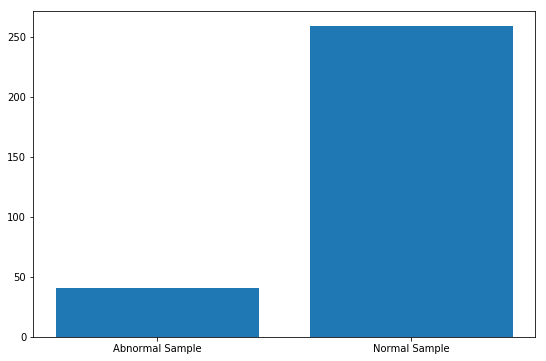

In [11]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
plt.bar(["Normal", "Abnormal"],Y['target'].value_counts())
ax.set_xticklabels(['Abnormal Sample', 'Normal Sample'])
ax.get_figure().savefig("imbalanced_data.png")
plt.show()

In [31]:
#Y['target'].value_counts()
X_norm.loc[Y['target'] == 1,'p1']

0     -0.512428
8      0.313852
11    -0.263788
16    -0.831163
25     0.213894
26     0.591766
37    -0.277643
50    -0.581237
51     0.343021
57     0.063437
59    -0.079335
67     1.355846
70    -1.103174
73    -0.906847
84     0.077941
85    -0.908623
112   -1.046184
113   -0.195889
122   -0.754620
131    0.486759
139    0.944720
142   -0.132080
145   -0.811288
148    0.293655
149    1.197066
162   -0.019926
163   -0.465964
165   -0.038991
168   -0.614806
188    0.430035
199    0.250414
200   -0.040123
203   -1.106986
205   -0.627751
213   -0.452109
214   -0.616470
225   -0.618030
231   -0.804525
260   -0.391839
271   -0.651011
287    0.896647
Name: p1, dtype: float64

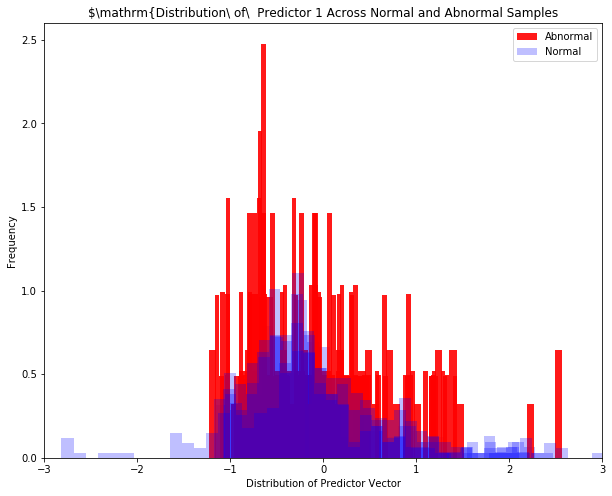

In [39]:
import matplotlib.mlab as mlab
bin = 50
mu, sigma = 0,1 
plt.figure(1, figsize=(10, 8))
n, bins, patches = plt.hist(X_norm.loc[Y['target'] == 1,'p1'], normed=True,color = "r", bins=bin,alpha = 0.9)
n, bins, patches = plt.hist(X_norm.loc[Y['target'] == 0,'p1'], normed=True,color = "b", bins=bin,alpha= 0.25)
n, bins, patches = plt.hist(X_norm.loc[Y['target'] == 1,'p2'], normed=True,color = "r", bins=bin,alpha = 0.9)
n, bins, patches = plt.hist(X_norm.loc[Y['target'] == 1,'p3'], normed=True,color = "r", bins=bin,alpha = 0.9)
n, bins, patches = plt.hist(X_norm.loc[Y['target'] == 1,'p4'], normed=True,color = "r", bins=bin,alpha = 0.9)
n, bins, patches = plt.hist(X_norm.loc[Y['target'] == 1,'p5'], normed=True,color = "r", bins=bin,alpha = 0.9)
n, bins, patches = plt.hist(X_norm.loc[Y['target'] == 0,'p2'], normed=True,color = "b", bins=bin,alpha= 0.25)
n, bins, patches = plt.hist(X_norm.loc[Y['target'] == 0,'p3'], normed=True,color = "b", bins=bin,alpha= 0.25)
n, bins, patches = plt.hist(X_norm.loc[Y['target'] == 0,'p4'], normed=True,color = "b", bins=bin,alpha= 0.25)
n, bins, patches = plt.hist(X_norm.loc[Y['target'] == 0,'p5'], normed=True,color = "b", bins=bin,alpha= 0.25)
plt.xlabel('Distribution of Predictor Vector')
plt.ylabel('Frequency')
plt.title(r'$\mathrm{Distribution\ of\  Predictor 1 Across Normal and Abnormal Samples')
plt.legend(["Abnormal", "Normal"])
plt.xlim(-3,3)
plt.show()
plt.savefig("C:/Users/edgil/Documents/Masters/machine_learning/Coursework/images/TrainDatahistogram.png")

In [41]:
# Run PCA on the predictor variables
from sklearn.decomposition import PCA
X_norm = X_norm.dropna(axis = 0, how = "any")
pca_data = PCA(n_components=16)
# find the PCs
pca = pca_data.fit_transform(X_norm)
# Find the variance explained within each PC
var_exp = pca_data.explained_variance_ratio_

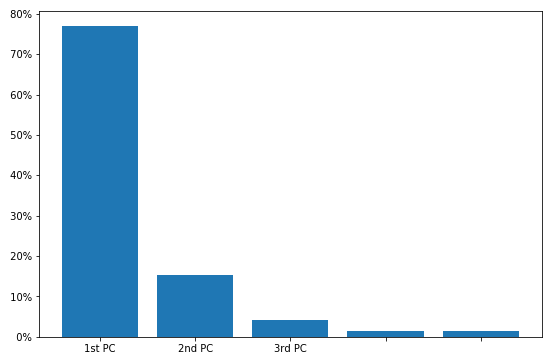

In [43]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
ax.bar(['1st PC', '2nd PC', "3rd PC", "4th PC", "5th PC"],var_exp[:5])
ax.set_xticklabels(['1st PC', '2nd PC', "3rd PC"])
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])
fig = ax.get_figure()
fig.savefig("varianeExpTrn1.png")


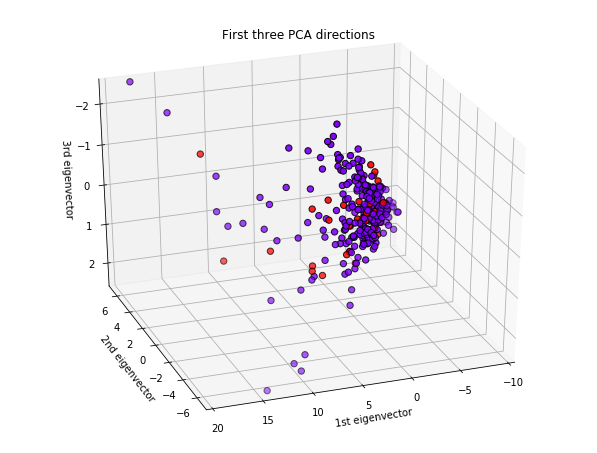

In [66]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(pca[:, 0], pca[:, 1], pca[:, 2], c=Y['target'],
           cmap="rainbow", edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_xlim(-10,20)
ax.set_ylabel("2nd eigenvector")
ax.set_ylim(-7,7)
#ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.set_zlim(-2.5,2.5)
#ax.w_zaxis.set_ticklabels([])
fig = ax.get_figure()
fig.savefig("pca_colon.png")

In [141]:
# quick look at running a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 205)
rfe = rfe.fit(X_norm, Y['target'])
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


C:\Users\edgil\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [67]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_norm, Y['target'])


In [72]:
print(logit.predict(X_norm))
print(logit.predict_proba(X_norm.loc[:2, :]))
print(logit.score(X_norm, Y['target']))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
[[0.83972655 0.16027345]
 [0.9147215  0.0852785 ]
 [0.83640151 0.16359849]]
0.8633333333333333


In [69]:
file_name = r"/1tst.SSV"
test_data = pd.read_csv(csv_path + file_name, header = None, sep = "\t")
new_col_names = ["p1", "p2","p3", "p4","p5","p6","p7","p8","p9","p10","p11","p12","p13","p14","p15","p16","target"]
col_names = dict(zip(list(test_data.columns),new_col_names ))
test_data.rename(columns = col_names, inplace=True)
print(test_data.loc[test_data['target'] == 255,'target'])

485     255
486     255
547     255
548     255
608     255
609     255
669     255
670     255
730     255
731     255
791     255
792     255
852     255
853     255
913     255
914     255
974     255
975     255
1035    255
1036    255
1095    255
1096    255
1097    255
1156    255
1157    255
1158    255
1217    255
1218    255
1219    255
1277    255
       ... 
2973    255
2974    255
2975    255
2976    255
2977    255
3028    255
3029    255
3030    255
3031    255
3032    255
3033    255
3034    255
3035    255
3036    255
3037    255
3038    255
3090    255
3091    255
3092    255
3093    255
3094    255
3095    255
3096    255
3097    255
3098    255
3153    255
3154    255
3155    255
3156    255
3157    255
Name: target, Length: 488, dtype: int64


In [73]:
test_data.loc[test_data['target'] == 255,'target'] = 1
#split the data into predictor and target space
X_test = test_data.loc[:, test_data.columns != "target"]
Y_test = pd.DataFrame(test_data['target'], columns = ["target"])
# Standardise the data using sklearn
# transform X vector into mean 0 and variance 1
X_norm_test = pd.DataFrame(preprocessing.scale(X_test),columns = list(X_test.columns))
print(logit.score(X_norm_test, Y_test['target']))
Y_predicted = logit.predict(X_norm_test)

0.8672399892502015


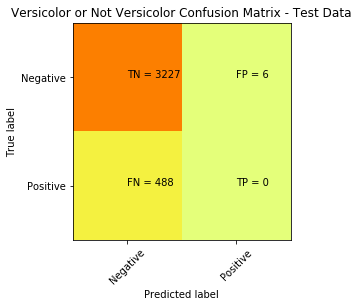

In [75]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test['target'], Y_predicted)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

0.8469166408428881